In [1]:
# Se ainda não tiver instalado é necessário instalar a biblioteca PyMatgen com o comando pip install pymatgen
#Em seguida, a instalação da API do materials project é realizada com o comando pip install mp-api

from mp_api.client import MPRester
import numpy as np
import pandas as pd
import os

root = os.getcwd()
folder = root+'/Data'

with MPRester("n9x1jG0FCuU0bW8i7tMjZbMGycYU2xZM") as mpr:
#Os parametros de pesquisa utilizados para filtrar resultados estão disponiveis em https://api.materialsproject.org/redoc#tag/Materials-Summary
    docs = mpr.summary.search(k_vrh=[40,300],is_stable=True) 
   

C:\Users\otavi\anaconda3\lib\site-packages\mp_api\client\mprester.py:182: UserWarning: mpcontribs-client not installed. Install the package to query MPContribs data, or construct pourbaix diagrams: 'pip install mpcontribs-client'
  warnings.warn(


Retrieving SummaryDoc documents:   0%|          | 0/3028 [00:00<?, ?it/s]

In [2]:
#organizando os dados em listas

formula = []
element_names = []
composition_reduced = []
symmetry_struct = []
crystal_system = []
density = []
volume = []
bulk = []
shear = []
poisson = []
metal = []
experimental_report = []
for i in range(len(docs)):
    formula.append(docs[i].formula_pretty)
    element_names.append(docs[i].elements)
    composition_reduced.append(docs[i].composition_reduced)
    symmetry_struct.append(docs[i].symmetry)
    crystal_system.append(docs[i].symmetry.crystal_system.name)
    density.append(docs[i].density)
    volume.append(docs[i].volume)
    bulk.append(docs[i].k_vrh)
    shear.append(docs[i].g_vrh)
    poisson.append(docs[i].homogeneous_poisson)
    metal.append(docs[i].is_metal)
    if len(docs[i].database_IDs) ==0:
        experimental_report.append('False')
    else:
        experimental_report.append('True')

In [3]:
#Dataframe

df = pd.DataFrame()
df['Formula'] = formula
df['Elements'] = element_names
df['Composition'] = composition_reduced
df['Symmetry'] = symmetry_struct
df['Crystal system'] = crystal_system
df['Density [g/m$^3$]'] = density
df[r'Volume [$\mathring{A}^3$]'] = volume
df['Bulk modulus[GPa]'] = bulk
df['Shear modulus [GPa]'] = shear
df["Poisson"] = poisson
df['Metal'] = metal
df['Experimental report'] = experimental_report

In [170]:
#Salvar os dados em .csv
os.makedirs(folder, exist_ok=True)  
df.to_csv(folder+'/materials data.csv')  

In [4]:
df

,Formula,Elements,Composition,Symmetry,Crystal system,Density [g/m$^3$],Volume [$\mathring{A}^3$],Bulk modulus[GPa],Shear modulus [GPa],Poisson,Metal,Experimental report
0,TePb,"[Pb, Te]","(Te, Pb)",crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,cubic,7.943356,69.989118,40.046748,24.231896,0.248235,False,True
1,Sr3CrN3,"[Cr, N, Sr]","(Sr, Cr, N)",crystal_system=<CrystalSystem.hex_: 'Hexagonal...,hex_,4.316276,274.591721,40.065045,28.612698,0.211581,True,True
2,Li2S,"[Li, S]","(Li, S)",crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,cubic,1.673940,45.579160,40.076125,33.152909,0.175779,False,True
3,YMg3,"[Mg, Y]","(Y, Mg)",crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,cubic,2.763456,97.236871,40.129039,18.910194,0.296369,True,False
4,Ta2Se,"[Se, Ta]","(Ta, Se)",crystal_system=<CrystalSystem.tet: 'Tetragonal...,tet,12.499426,117.134691,40.141941,25.858963,0.234843,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3023,Ni2Mo3N,"[Mo, N, Ni]","(Ni, Mo, N)",crystal_system=<CrystalSystem.cubic: 'Cubic'> ...,cubic,9.624771,289.303680,273.483573,140.967346,0.280063,True,True
3024,TaIr,"[Ir, Ta]","(Ta, Ir)",crystal_system=<CrystalSystem.ortho: 'Orthorho...,ortho,19.473166,190.925770,273.691763,96.232837,0.342638,True,True
3025,Nb3B4,"[B, Nb]","(Nb, B)",crystal_system=<CrystalSystem.ortho: 'Orthorho...,ortho,7.218088,74.068418,273.944222,198.226621,0.208507,True,True
3026,BRh,"[B, Rh]","(B, Rh)",crystal_system=<CrystalSystem.hex_: 'Hexagonal...,hex_,9.336168,40.451435,275.143043,101.196196,0.336186,True,True


Text(0.5, 1.0, 'Bulk modulus vs material')

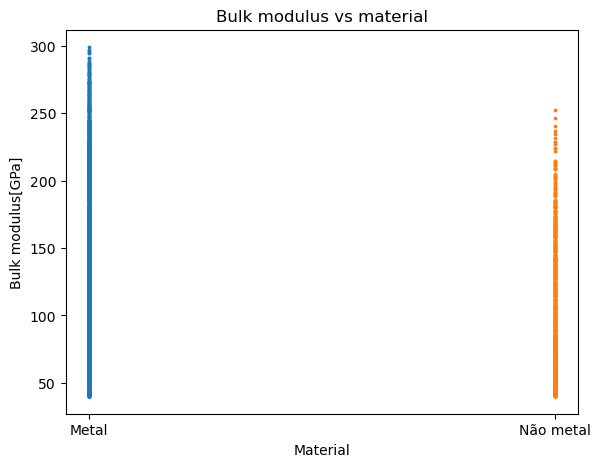

In [66]:
fig = plt.figure()

# Add set of axes to figure
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)


x_nmetal=[]
y_nmetal=[]
x_mmetal=[]
y_mmetal=[]
for i in range(len(df['Metal'])):
    if df['Metal'][i] == True:
        x_mmetal.append('Metal')
        y_mmetal.append(df['Bulk modulus[GPa]'][i])
    else:
        x_nmetal.append('Não metal')
        y_nmetal.append(df['Bulk modulus[GPa]'][i])
# Plot on that set of axes

axes.scatter(x_mmetal,y_mmetal,s=3)
axes.scatter(x_nmetal,y_nmetal,s=3)
axes.set_xlabel('Material') # Notice the use of set_ to begin methods
axes.set_ylabel(f"Bulk modulus[GPa]")
axes.set_title(f'Bulk modulus vs material')

Text(0.5, 0, 'Quantidade de composições diferentes: 3028')

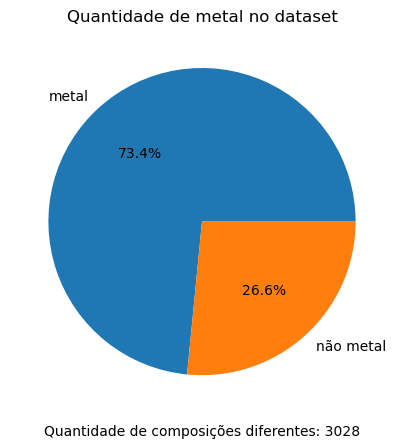

In [73]:
fig = plt.figure()
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8]) # left, bottom, width, height (range 0 to 1)
data = [len(x_mmetal),len(x_nmetal)]
labels = ['metal','não metal']
plt.pie(data, labels = labels,autopct='%.1f%%') 
axes.set_title(f'Quantidade de metal no dataset')
axes.set_xlabel('Quantidade de composições diferentes: 3028')